In [28]:
import pandas as pd

df_points = pd.read_csv('../data/final_df_points_18_21_class.csv')

In [29]:
df_points['idle_time'].max()

1439

In [33]:
df_points = df_points[(df_points['idle_time'] > 2)]
df_points

,bike_id,lat,lng,dt_start,dt_end,hex_id,hex_enc,in_zone,zone_name,zone_name_enc,...,wind_speed,humidity,year,month,day,start_min,over_night,idle_time_next_day,idle_time,idle_time_class
284,42203,51.324484,12.338183,1514985878,1514985938,881f1a8d93fffff,325,0,0,0,...,8.20,75.0,2018,1,2,805,0,0,1,1
460,27092,51.339963,12.382677,1515059780,1515059807,881f1a8cb7fffff,284,1,Blaue Zone Leipzig Ost 0€,1,...,7.20,75.0,2018,1,3,596,0,0,0,1
789,3085,51.345230,12.392187,1515196800,1515196861,881f1a8cb3fffff,282,1,Blaue Zone Leipzig Ost 0€,1,...,7.20,81.0,2018,1,5,0,0,0,1,1
1347,41840,51.321498,12.381345,1515400990,1515401016,881f1a1643fffff,127,1,Pinke Zone Leipzig Ost 1€,3,...,6.70,92.0,2018,1,0,523,0,0,0,1
1378,41840,51.324518,12.338348,1515425538,1515425558,881f1a8d93fffff,325,0,0,0,...,7.20,86.0,2018,1,0,932,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543579,72112,51.311556,12.373522,1640873690,1640873806,881f1a160dfffff,104,1,Blaue Zone Leipzig Ost 0€,1,...,1.79,83.0,2021,12,3,855,0,0,1,1
2543629,41730,51.337991,12.333180,1640876746,1640876773,881f1a8ca5fffff,276,1,Blaue Zone Leipzig West 0€,2,...,1.34,87.0,2021,12,3,906,0,0,0,1
2543699,100169,51.357587,12.368360,1640881486,1640881572,881f1a8c83fffff,261,1,Pinke Zone Leipzig Ost 1€,3,...,5.81,87.0,2021,12,3,985,0,0,1,1
2543718,97823,51.317804,12.378506,1640882974,1640882994,881f1a1609fffff,102,1,Pinke Zone Leipzig Ost 1€,3,...,5.81,87.0,2021,12,3,1010,0,0,0,1


In [21]:
def f(row):
    if row['idle_time'] < 1439:
        val = '1day'
    else:
        val = 'longer'
    return val

df_points['idle_time_class'] = df_points.apply(f, axis=1)

array([2210419,  179115])

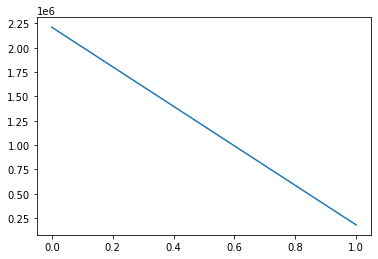

In [22]:
from matplotlib import pyplot as plt

fig = plt.plot(df_points.value_counts(['idle_time_class']).values)
df_points.value_counts(['idle_time_class']).values

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import wandb

#idle_time_data = pd.read_csv('../data/final_nosplit_df_points_18_21_class.csv')

idle_time_data = df_points

TargetVariable = ['idle_time_class']
Predictors = ['bike_id', 'lat', 'lng', 'temp', 'rain', 'snow', 'wind_speed', 'humidity', 'dt_start',
              'hex_enc', 'start_min', 'year', 'month', 'day', 'on_station', 'in_zone', 'zone_name_enc']

X = idle_time_data[Predictors].values
y = idle_time_data[TargetVariable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [24]:
from sklearn.metrics import f1_score


def eval_classification(y_test,y_pred,labels):
    # Metrics
    # Accuracy, precision, recall
    acc = accuracy_score(y_test, y_pred.ravel())
    macro_precision = precision_score(y_test.ravel(), y_pred.ravel(), average='macro', labels=labels)
    micro_precision = precision_score(y_test.ravel(), y_pred.ravel(), average='micro', labels=labels)
    macro_recall = recall_score(y_test.ravel(), y_pred.ravel(), average='macro', labels=labels)
    micro_recall = recall_score(y_test.ravel(), y_pred.ravel(), average='micro', labels=labels)

    macro_f1 = f1_score(y_test.ravel(), y_pred.ravel(), average='macro', labels=labels)
    micro_f1 = f1_score(y_test.ravel(), y_pred.ravel(), average='micro', labels=labels)

    print(acc)
    print(macro_precision, micro_precision)
    print(macro_recall,micro_recall)
    print(macro_f1,micro_f1)

In [25]:
model = RandomForestClassifier(n_jobs=2,n_estimators=128)

In [26]:
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test,y_pred)

eval_classification(y_test,y_pred,['1day','longer'])

print(classification_report(y_test,y_pred))

[[451501   2097]
 [ 20660   3649]]
0.9523819487891996
0.7956471043931237 0.9523819487891996
0.5727429884329691 0.9523819487891996
0.609119751143173 0.9523819487891996
              precision    recall  f1-score   support

        1day       0.96      1.00      0.98    453598
      longer       0.64      0.15      0.24     24309

    accuracy                           0.95    477907
   macro avg       0.80      0.57      0.61    477907
weighted avg       0.94      0.95      0.94    477907



In [13]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test,y_pred)

eval_classification(y_test,y_pred,['1day','longer'])

print(classification_report(y_test,y_pred))

[[313251    862]
 [ 13476    429]]
0.9562889841411142
0.645527549385864 0.9562889841411142
0.5140539880399715 0.9562889841411142
0.5170442337305411 0.9562889841411142
              precision    recall  f1-score   support

        1day       0.96      1.00      0.98    314113
      longer       0.33      0.03      0.06     13905

    accuracy                           0.96    328018
   macro avg       0.65      0.51      0.52    328018
weighted avg       0.93      0.96      0.94    328018



In [57]:
from math import sqrt

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import wandb
import random

idle_time_data = pd.read_csv('../data/final_df_points_18_21_class.csv')

TargetVariable = ['idle_time']
Predictors = ['bike_id', 'lat', 'lng', 'temp', 'rain', 'snow', 'wind_speed', 'humidity', 'dt_start',
              'hex_enc', 'start_min', 'year', 'month', 'day', 'on_station', 'in_zone', 'zone_name_enc']

X = idle_time_data[Predictors].values
y = idle_time_data[TargetVariable].values

#PredictorScaler = StandardScaler()
#PredictorScalerFit = PredictorScaler.fit(X)
#X = PredictorScalerFit.transform(X)

#TargetScaler = StandardScaler()
#TargetScalerFit = TargetScaler.fit(y)
#y = TargetScalerFit.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=False)


def eval_regression(y_test,y_pred):
    # Metrics
    # r2, mae, mse, rmse
    r2 = r2_score(y_test, y_pred.ravel())
    mae = mean_absolute_error(y_test, y_pred.ravel())
    mse = mean_squared_error(y_test, y_pred.ravel())
    rmse = sqrt(mse)

    print('r2: %f' % r2)
    print('mae: %f' % mae)
    print('mse: %f' % mse)
    print('rmse: %f' % rmse)

    return r2, mse, rmse, mae

In [58]:


model = MLPRegressor()

model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)


In [48]:
#y_pred_trans = TargetScalerFit.inverse_transform(y_pred.reshape(-1, 1))

In [49]:
#y_test_trans = TargetScalerFit.inverse_transform(y_test.reshape(-1, 1))

In [50]:
# trans scaled
r2, mse, rmse, mae = eval_regression(y_test_trans, y_pred_trans)

r2: 0.275360
mae: 224.179251
mse: 104029.004863
rmse: 322.535277


In [53]:
# not backscaled
r2, mse, rmse, mae = eval_regression(y_test, y_pred)

r2: 0.354811
mae: 0.524526
mse: 0.566589
rmse: 0.752721


In [56]:
# not scaled y
r2, mse, rmse, mae = eval_regression(y_test, y_pred)

r2: 0.469226
mae: 201.076594
mse: 76197.737297
rmse: 276.039376


In [59]:
# not scaled everything
r2, mse, rmse, mae = eval_regression(y_test, y_pred)

r2: -0.256116
mae: 261.690225
mse: 180327.400447
rmse: 424.649739
